In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from tqdm import tqdm
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.manifold import TSNE
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
import scipy.cluster.hierarchy as sch
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from yellowbrick.cluster import KElbowVisualizer
from sklearn.metrics import silhouette_score as sil, calinski_harabasz_score as chs, silhouette_samples

import warnings
warnings.filterwarnings('ignore')

In [2]:
from google.colab import files
Uploaded=files.upload()

Saving wine.csv to wine.csv


In [3]:
wine_data = pd.read_csv('wine.csv')
wine_data.head()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


# **Data Understanding**

In [4]:
wine_data.Type.unique()

array([1, 2, 3])

In [5]:
wine_data.Type.value_counts()

2    71
1    59
3    48
Name: Type, dtype: int64

In [6]:
wine_data['ID'] = range(1, 179, 1)
wine_data

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline,ID
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,2
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,3
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,4
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740,174
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750,175
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835,176
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840,177


In [7]:
wine_data.describe()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline,ID
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,89.500000
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,51.528309
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,1.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,45.250000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,89.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,133.750000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,178.000000


**Looking for some statistical information about each feature, we can see that the features have very diferrent scales**

In [9]:
wine_data.info() #178 rows, 15 columns and no null value

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Type             178 non-null    int64  
 1   Alcohol          178 non-null    float64
 2   Malic            178 non-null    float64
 3   Ash              178 non-null    float64
 4   Alcalinity       178 non-null    float64
 5   Magnesium        178 non-null    int64  
 6   Phenols          178 non-null    float64
 7   Flavanoids       178 non-null    float64
 8   Nonflavanoids    178 non-null    float64
 9   Proanthocyanins  178 non-null    float64
 10  Color            178 non-null    float64
 11  Hue              178 non-null    float64
 12  Dilution         178 non-null    float64
 13  Proline          178 non-null    int64  
 14  ID               178 non-null    int64  
dtypes: float64(11), int64(4)
memory usage: 21.0 KB


In [10]:
wine_data.isnull().sum()

Type               0
Alcohol            0
Malic              0
Ash                0
Alcalinity         0
Magnesium          0
Phenols            0
Flavanoids         0
Nonflavanoids      0
Proanthocyanins    0
Color              0
Hue                0
Dilution           0
Proline            0
ID                 0
dtype: int64

In [11]:
wine_data.skew()

Type               0.107431
Alcohol           -0.051482
Malic              1.039651
Ash               -0.176699
Alcalinity         0.213047
Magnesium          1.098191
Phenols            0.086639
Flavanoids         0.025344
Nonflavanoids      0.450151
Proanthocyanins    0.517137
Color              0.868585
Hue                0.021091
Dilution          -0.307285
Proline            0.767822
ID                 0.000000
dtype: float64

# **Exploratory Data Analysis**

**Plotting the histogram of each numerical variable (in this case, all features), the main idea here is to visualize the data distribution for each feature. This method can bring fast insights as:**


Check the kind of each feature distribution


Check data symmetry


Verify features frequency


Identify outliers

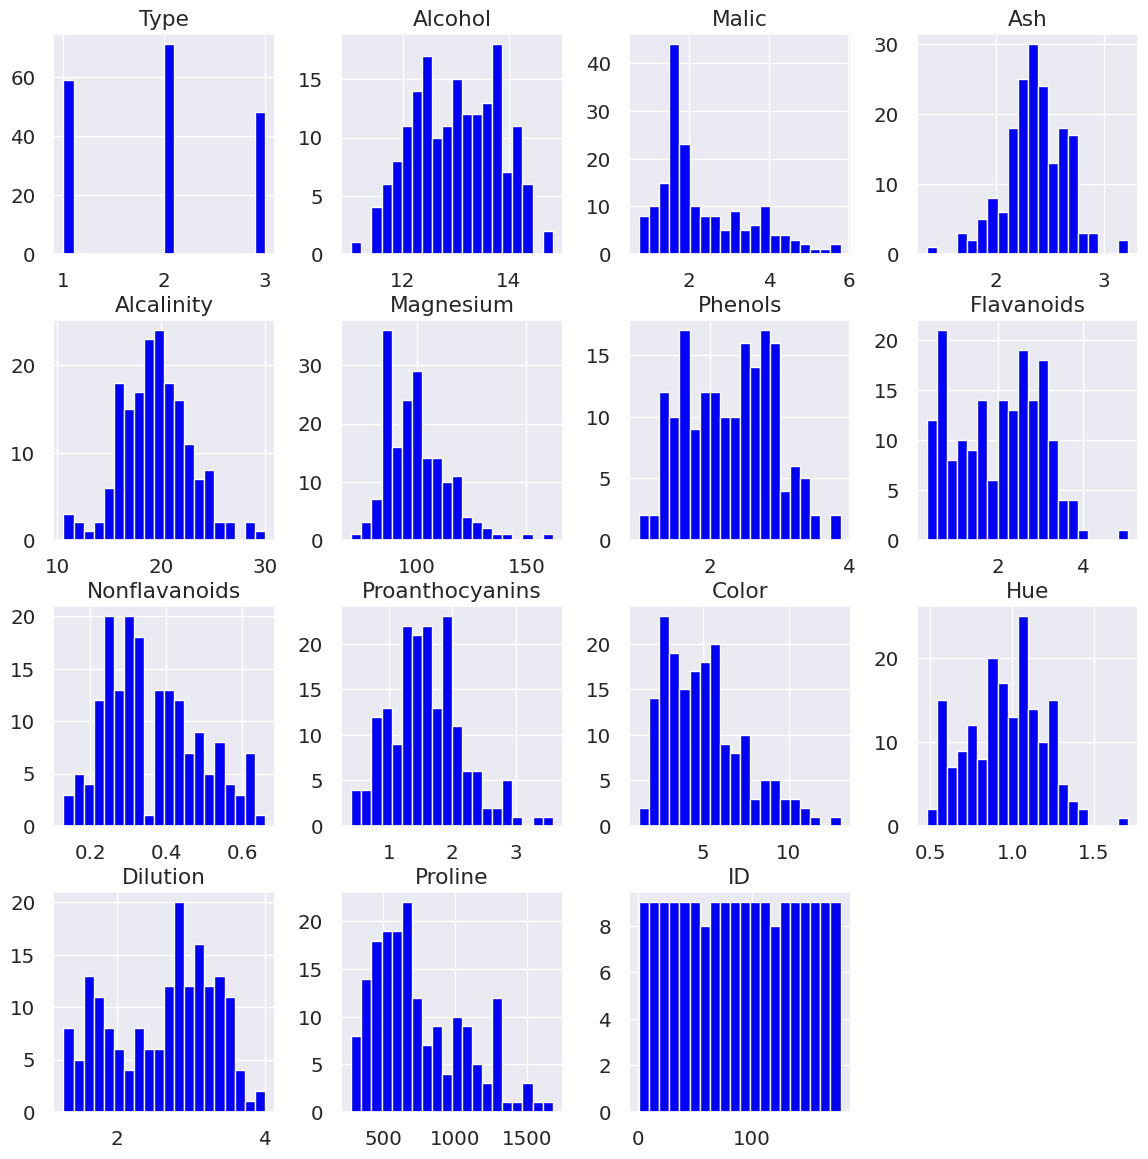

In [12]:
sns.set(style= 'dark', font_scale= 1.3, rc= {'figure.figsize':(14,14)})
ax = wine_data.hist(bins= 20, color= 'blue')

**Outliers Detection**

In [13]:
wine_data.columns

Index(['Type', 'Alcohol', 'Malic', 'Ash', 'Alcalinity', 'Magnesium', 'Phenols',
       'Flavanoids', 'Nonflavanoids', 'Proanthocyanins', 'Color', 'Hue',
       'Dilution', 'Proline', 'ID'],
      dtype='object')

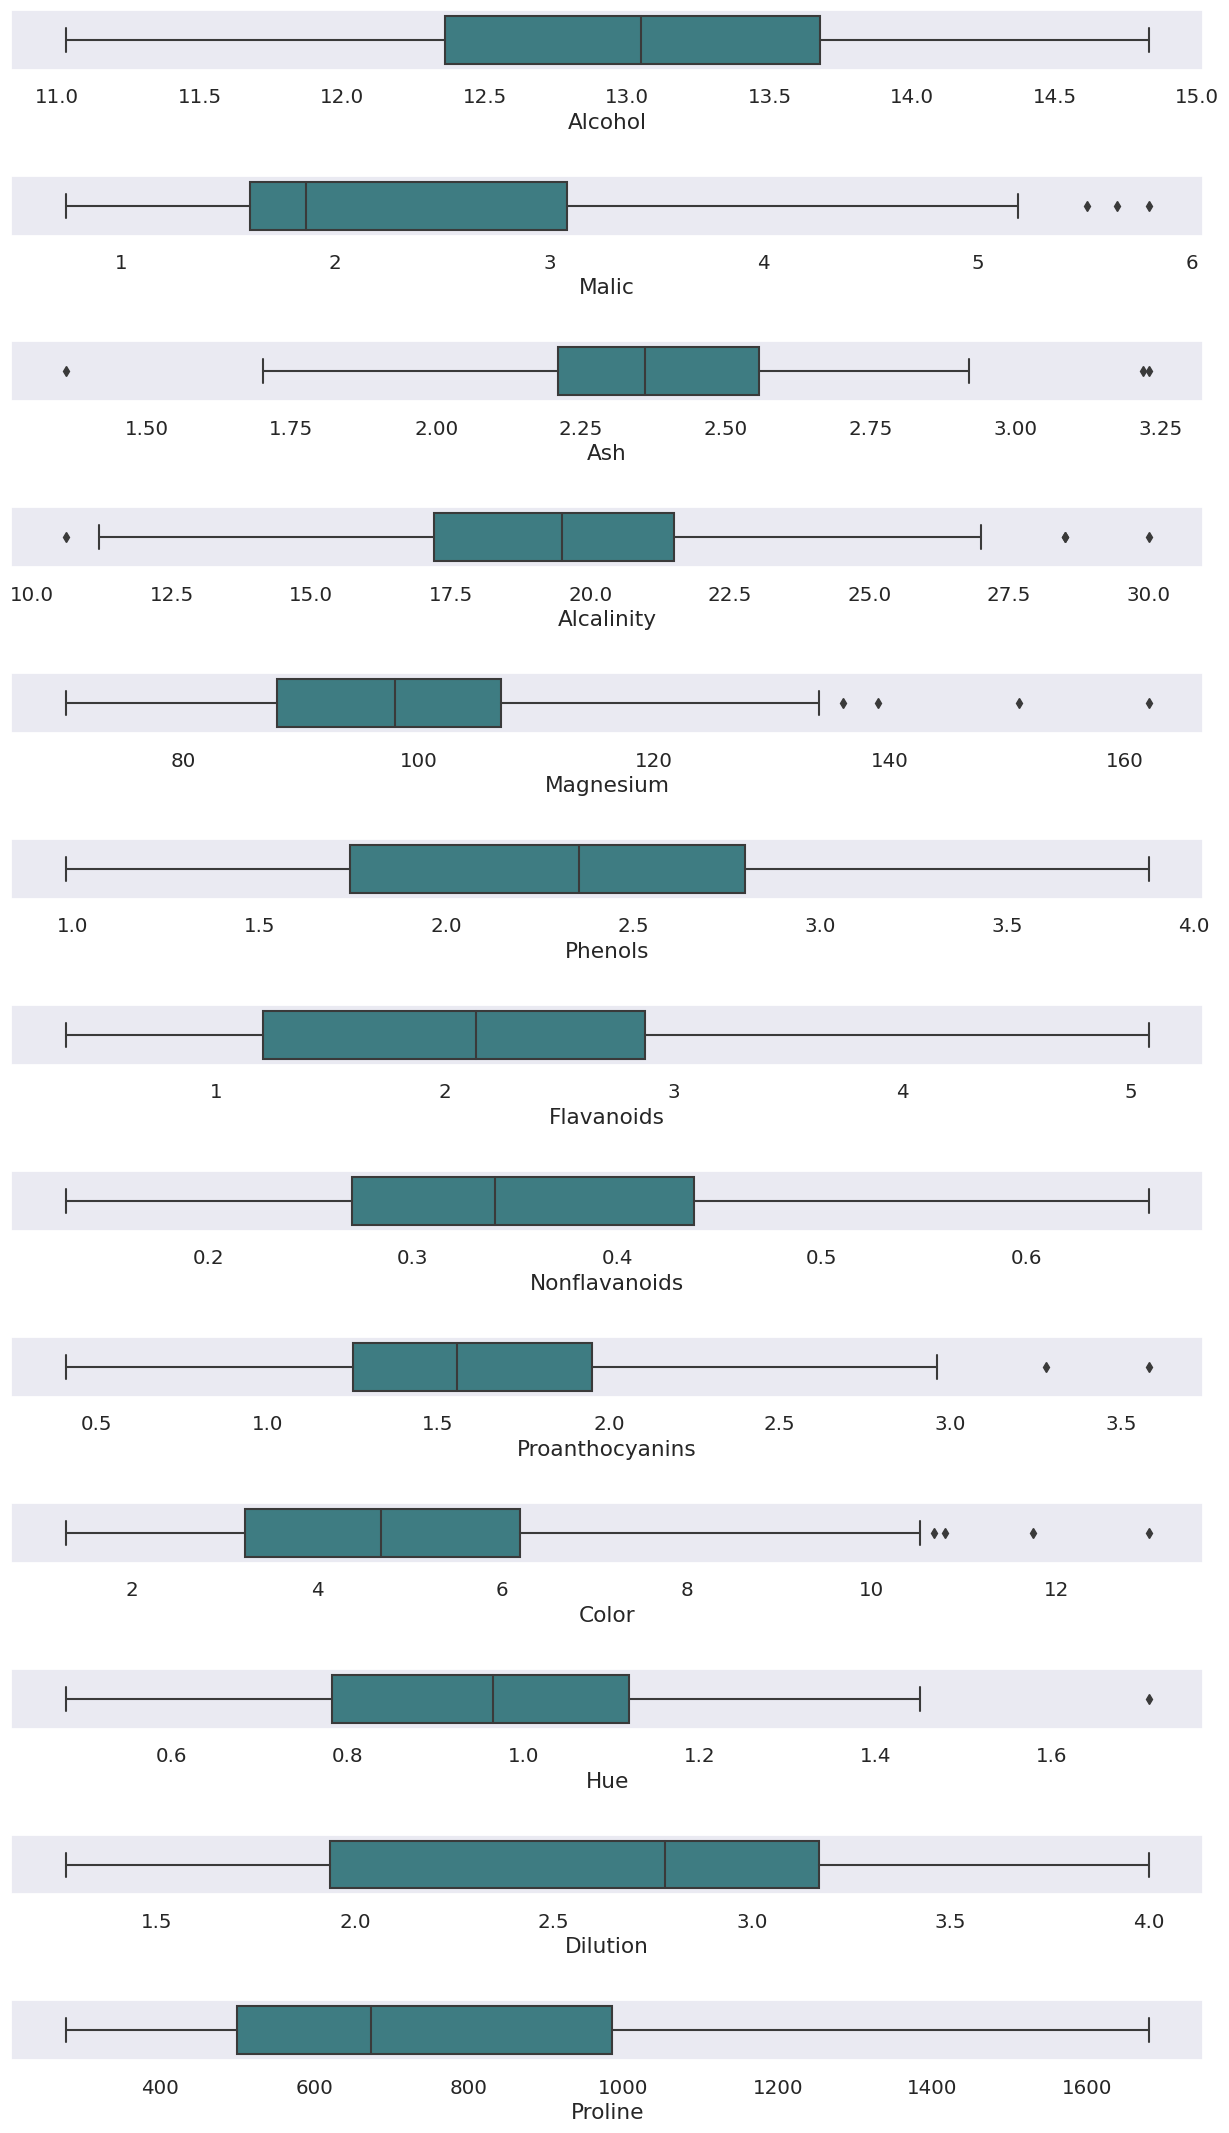

In [16]:
outlier = wine_data.copy()
fig, axes=plt.subplots(13,1, figsize=(13,22),sharex=False,sharey=False)
sns.boxplot(x='Alcohol',data=outlier,palette='crest',ax=axes[0])
sns.boxplot(x='Malic',data=outlier,palette='crest',ax=axes[1])
sns.boxplot(x='Ash',data=outlier,palette='crest',ax=axes[2])
sns.boxplot(x='Alcalinity',data=outlier,palette='crest',ax=axes[3])
sns.boxplot(x='Magnesium',data=outlier,palette='crest',ax=axes[4])
sns.boxplot(x='Phenols',data=outlier,palette='crest',ax=axes[5])
sns.boxplot(x='Flavanoids',data=outlier,palette='crest',ax=axes[6])
sns.boxplot(x='Nonflavanoids',data=outlier,palette='crest',ax=axes[7])
sns.boxplot(x='Proanthocyanins',data=outlier,palette='crest',ax=axes[8])
sns.boxplot(x='Color',data=outlier,palette='crest',ax=axes[9])
sns.boxplot(x='Hue',data=outlier,palette='crest',ax=axes[10])
sns.boxplot(x='Dilution',data=outlier,palette='crest',ax=axes[11])
sns.boxplot(x='Proline',data=outlier,palette='crest',ax=axes[12])
plt.tight_layout(pad=2.0)

**Correlation Heatmap**

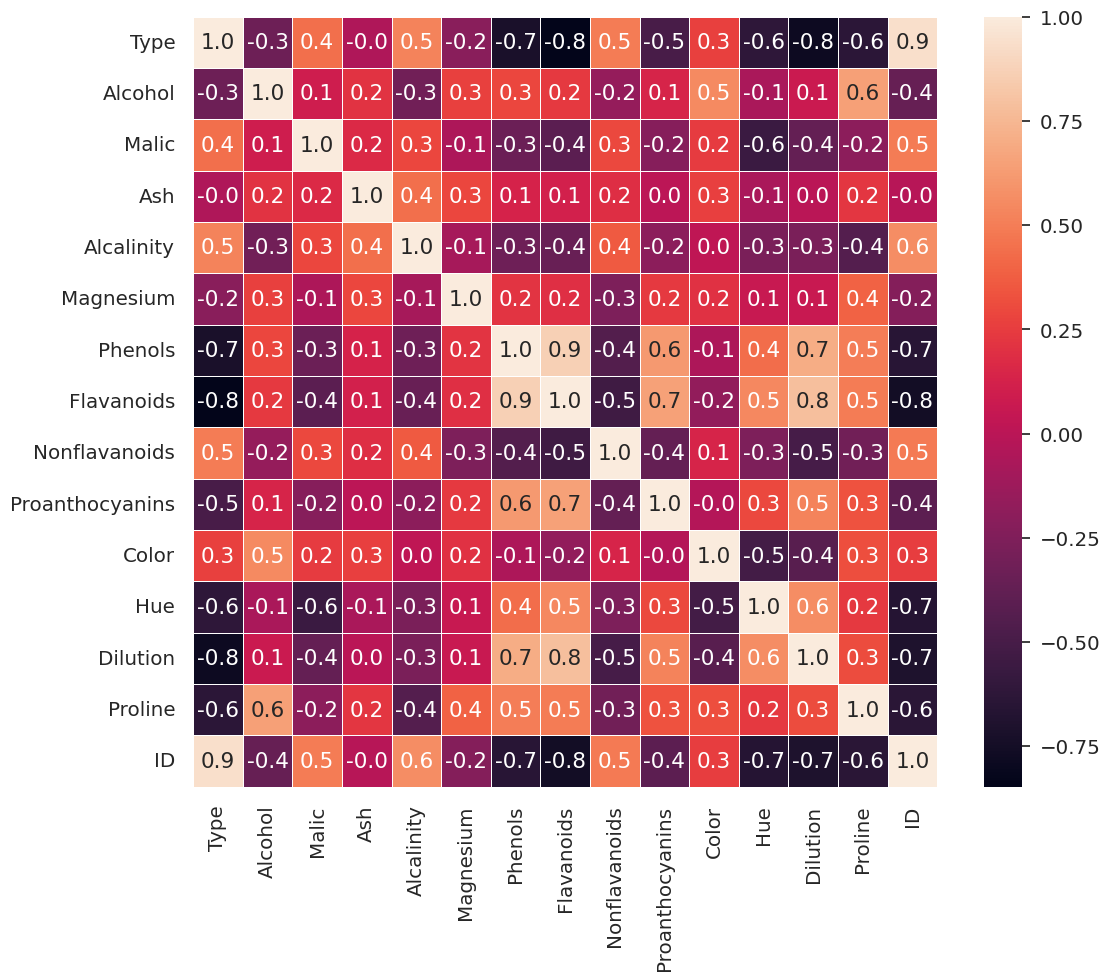

In [17]:
f,ax = plt.subplots(figsize=(12,10))
sns.heatmap(wine_data.corr(), annot=True, linewidths =.5, fmt ='.1f',ax=ax)
plt.show()

**Unique points in this correlation matrix:**


Phenols is positively correlated with Flavanoids, Dilution and Proanthocyanins


Flavanoids is positively correlated with Proanthocyanins and Dilution


Dilution is positively correlated with Hue


Alcohol is positively correlated with Proline

**Plotting frequent flying Phenols vs. Flavanoids**

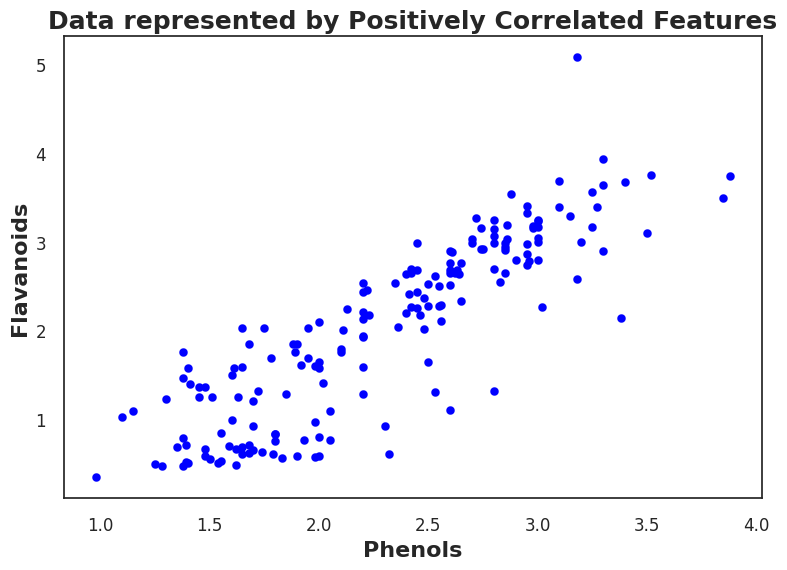

In [18]:
sns.set(style='white', rc= {'figure.figsize':(9,6)}, font_scale=1.1)

plt.scatter(x= wine_data['Phenols'], y= wine_data['Flavanoids'], color='blue', lw=0.1)
plt.xlabel('Phenols',fontweight='bold', fontsize=16)
plt.ylabel('Flavanoids',fontweight='bold', fontsize=16)
plt.title('Data represented by Positively Correlated Features',fontweight='bold',fontsize= 18)
plt.show()

# **Data Preprocessing**

In [19]:
wine_data.head()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline,ID
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,2
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,3
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,4
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,5


In [20]:
wine_df = wine_data.set_index('ID')
wine_df.head()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
ID,,,,,,,,,,,,,,
1,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
2,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
3,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
4,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
5,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


**Applying Standard Scaler on the Data**

In [21]:
standard_scaler = StandardScaler()
std_wine = standard_scaler.fit_transform(wine_data)
std_wine.shape

(178, 15)

**Applying MinMax Scaler on Dataset**

In [22]:
minmax = MinMaxScaler()

norm_wine = minmax.fit_transform(wine_data)
norm_wine.shape

(178, 15)

# **PCA (Principal Component Analysis)**

### **PCA on Standard Scaled Dataset**

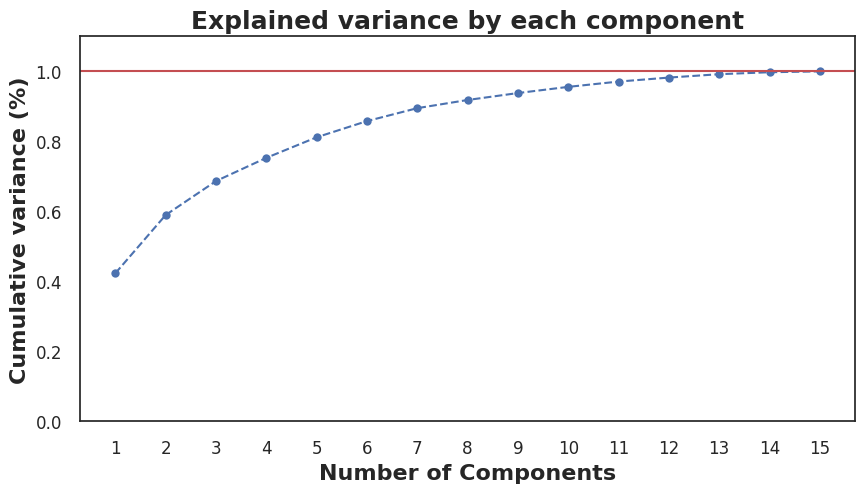

In [23]:
pca_var = PCA()
pca_var.fit(std_wine)

# Plot
plt.figure(figsize=(10,5))
xi = np.arange(1, 1 + std_wine.shape[1], step=1)
yi = np.cumsum(pca_var.explained_variance_ratio_)
plt.plot(xi, yi, marker='o', linestyle='--', color='b')

# Aesthetics
plt.ylim(0.0,1.1)
plt.xlabel('Number of Components',fontweight='bold', fontsize=16)
plt.xticks(np.arange(1, 1+std_wine.shape[1], step=1))
plt.ylabel('Cumulative variance (%)',fontweight='bold', fontsize=16)
plt.title('Explained variance by each component',fontweight='bold',fontsize=18)
plt.axhline(y=1, color='r', linestyle='-')
plt.gca().xaxis.grid(False)

**The amount of variance that each PCA explains is**

In [24]:
var = pca_var.explained_variance_ratio_
var

array([0.42315618, 0.16647321, 0.09699353, 0.06632946, 0.05877432,
       0.04624981, 0.03695786, 0.0233517 , 0.01982763, 0.01765908,
       0.0151364 , 0.01143312, 0.00964268, 0.00560632, 0.0024087 ])

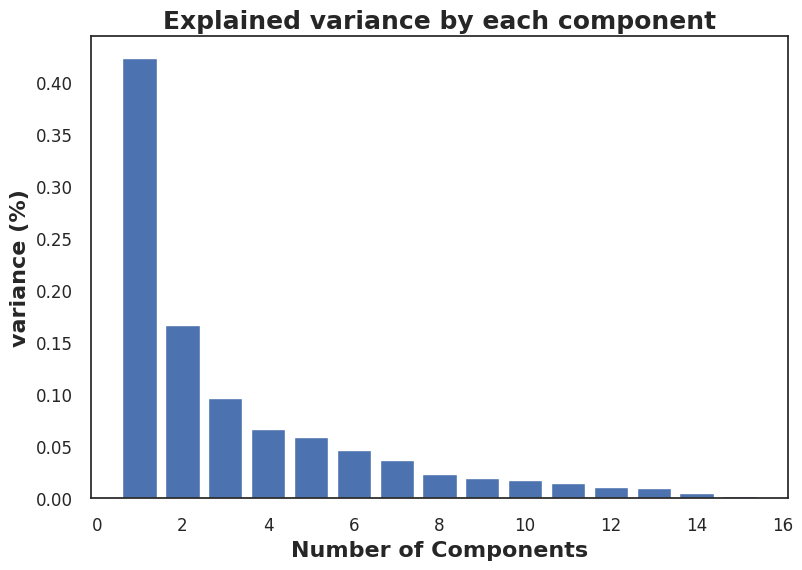

In [25]:
plt.bar(range(1, len(var) + 1), var)
plt.xlabel('Number of Components', fontweight='bold', fontsize=16)
plt.ylabel('variance (%)', fontweight='bold', fontsize=16)
plt.title('Explained variance by each component',fontweight='bold',fontsize=18)
plt.show()

**Cumulative Variance**

In [26]:
var1 = np.cumsum(np.round(var,decimals = 4)*100)
var1

array([ 42.32,  58.97,  68.67,  75.3 ,  81.18,  85.8 ,  89.5 ,  91.84,
        93.82,  95.59,  97.1 ,  98.24,  99.2 ,  99.76, 100.  ])

In [27]:
pca = PCA(n_components=3)
pca_std = pca.fit_transform(std_wine)

# Convert to data frame
pca_std_wine = pd.DataFrame(data = pca_std, columns = ['PC1', 'PC2','PC3'])

# Shape and preview
print(pca_std_wine.shape)
pca_std_wine.head()

(178, 3)


,PC1,PC2,PC3
0,3.906276,-1.454982,-0.155368
1,3.005931,0.330906,-2.079463
2,3.187606,-1.038081,0.978714
3,4.245701,-2.771261,-0.126183
4,1.904549,-0.866149,1.917434


**PCA plot in 2D**

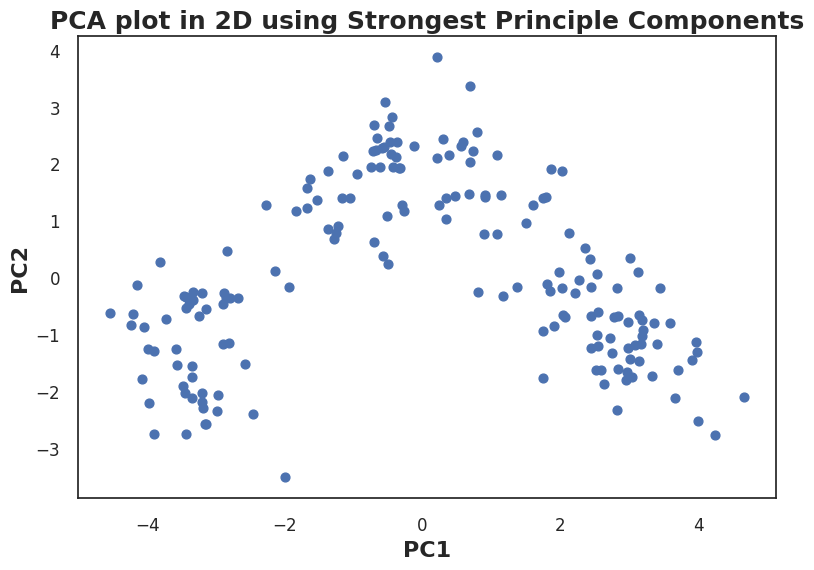

In [28]:
plt.figure(figsize=(9,6))

# Scatterplot
plt.scatter(pca_std_wine.iloc[:,0], pca_std_wine.iloc[:,1], s=40)

# Aesthetics
plt.title('PCA plot in 2D using Strongest Principle Components',fontweight='bold',fontsize=18)
plt.xlabel('PC1',fontweight='bold', fontsize=16)
plt.ylabel('PC2',fontweight='bold', fontsize=16)
plt.show()

**PCA on MinMax Scaled Dataset**

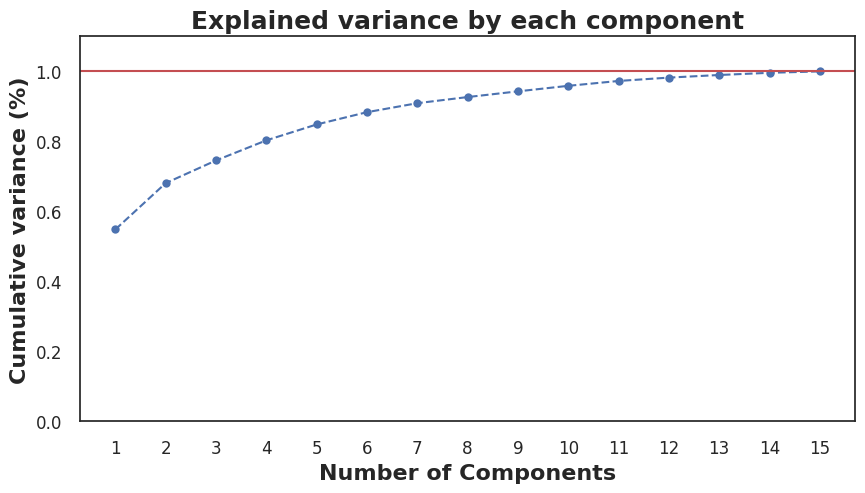

In [29]:
pca_var = PCA()
pca_var.fit(norm_wine)

# Plot
plt.figure(figsize=(10,5))
xi = np.arange(1, 1 + norm_wine.shape[1], step=1)
yi = np.cumsum(pca_var.explained_variance_ratio_)
plt.plot(xi, yi, marker='o', linestyle='--', color='b')

# Aesthetics
plt.ylim(0.0,1.1)
plt.xlabel('Number of Components',fontweight='bold', fontsize=16)
plt.xticks(np.arange(1, 1 + norm_wine.shape[1], step=1))
plt.ylabel('Cumulative variance (%)',fontweight='bold', fontsize=16)
plt.title('Explained variance by each component',fontweight='bold',fontsize=18)
plt.axhline(y=1, color='r', linestyle='-')
plt.gca().xaxis.grid(False)

**The amount of variance that each PCA explains is**

In [30]:
var = pca_var.explained_variance_ratio_
var

array([0.54830941, 0.13241097, 0.06480939, 0.0574237 , 0.04538901,
       0.0350859 , 0.02569862, 0.01752812, 0.01631456, 0.01577557,
       0.01391124, 0.00958205, 0.00746694, 0.00626671, 0.00402782])

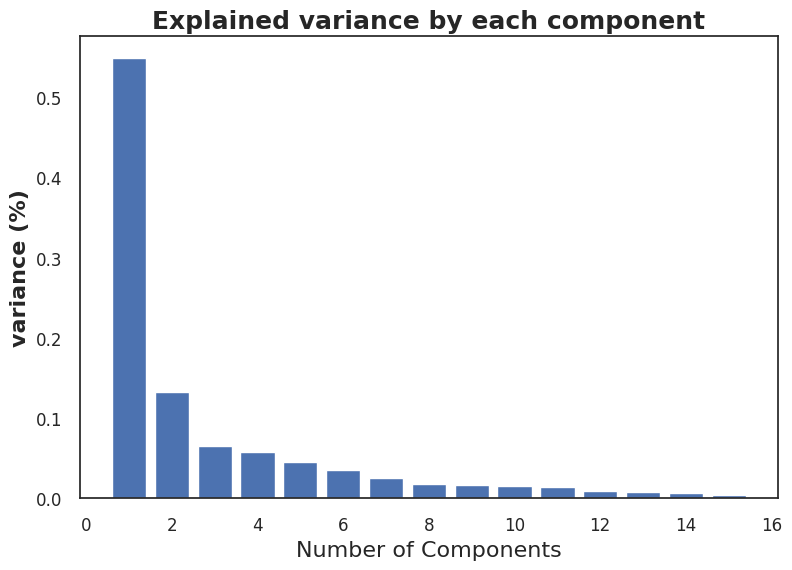

In [31]:
plt.bar(range(1, len(var)+1),var)
plt.xlabel('Number of Components',fontsize=16)
plt.ylabel('variance (%)',fontweight='bold', fontsize=16)
plt.title('Explained variance by each component',fontweight='bold',fontsize=18)
plt.show()

**Cumulative Variance**

In [32]:
var1 = np.cumsum(np.round(var,decimals = 4)*100)
var1

array([ 54.83,  68.07,  74.55,  80.29,  84.83,  88.34,  90.91,  92.66,
        94.29,  95.87,  97.26,  98.22,  98.97,  99.6 , 100.  ])

In [56]:
pca = PCA(n_components=3)
pca_norm = pca.fit_transform(norm_wine)

# Convert to data frame
pca_norm_wine = pd.DataFrame(data = pca_norm, columns = ['PC1', 'PC2','PC3'])

# Shape and preview
print(pca_norm_wine.shape)
pca_norm_wine.head()

(178, 3)


,PC1,PC2,PC3
0,-0.979144,-0.241592,0.032566
1,-0.827752,-0.009548,-0.291197
2,-0.838919,-0.183929,0.127351
3,-1.050659,-0.561901,0.160457
4,-0.613267,-0.068768,0.051951


**The new columns are called Principal Components (PC's) and give the coordinates of the data in the new smaller space**

## **PCA plot in 2D**

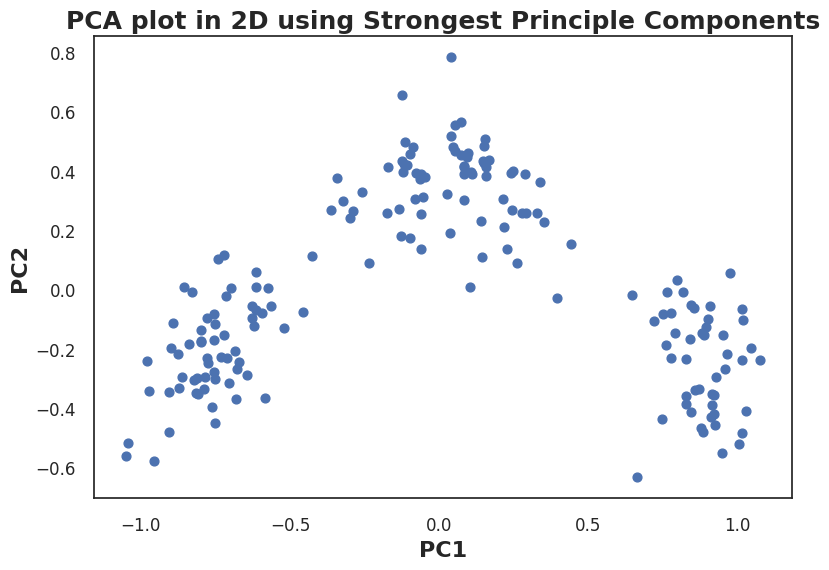

In [34]:
plt.figure(figsize=(9,6))
plt.scatter(pca_norm_wine.iloc[:,0], pca_norm_wine.iloc[:,1], s=40)

plt.title('PCA plot in 2D using Strongest Principle Components',fontweight='bold',fontsize=18)
plt.xlabel('PC1',fontweight='bold', fontsize=16)
plt.ylabel('PC2',fontweight='bold', fontsize=16)
plt.show()

**Notes:**


Notice how these points have no colours (yet) because we don't know what their classes are. This is what makes it an unsupervised method.


We know our dataset falls naturally into 3 classes (3 types of wine), so we assign colours by clustering the data into 3 groups using techniques such as k-Means and Hierarchical.

# **Performing Heirarchical Agglomerative Clustering**

In [48]:
H_clusters=AgglomerativeClustering(n_clusters=3,affinity='euclidean',linkage='ward')
H_clusters

AgglomerativeClustering(affinity='euclidean', n_clusters=3)

In [50]:
y=pd.DataFrame(H_clusters.fit_predict(norm_wine),columns=['clustersid_H'])
y['clustersid_H'].value_counts()

0    71
2    59
1    48
Name: clustersid_H, dtype: int64

In [55]:
wine_df['Hierarchical_Labels'] = H_clusters.labels_
wine_df.head()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline,Hierarchical_Labels
ID,,,,,,,,,,,,,,,
1,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,2
2,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,2
3,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,2
4,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,2
5,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,2


# **KMeans Clustering**

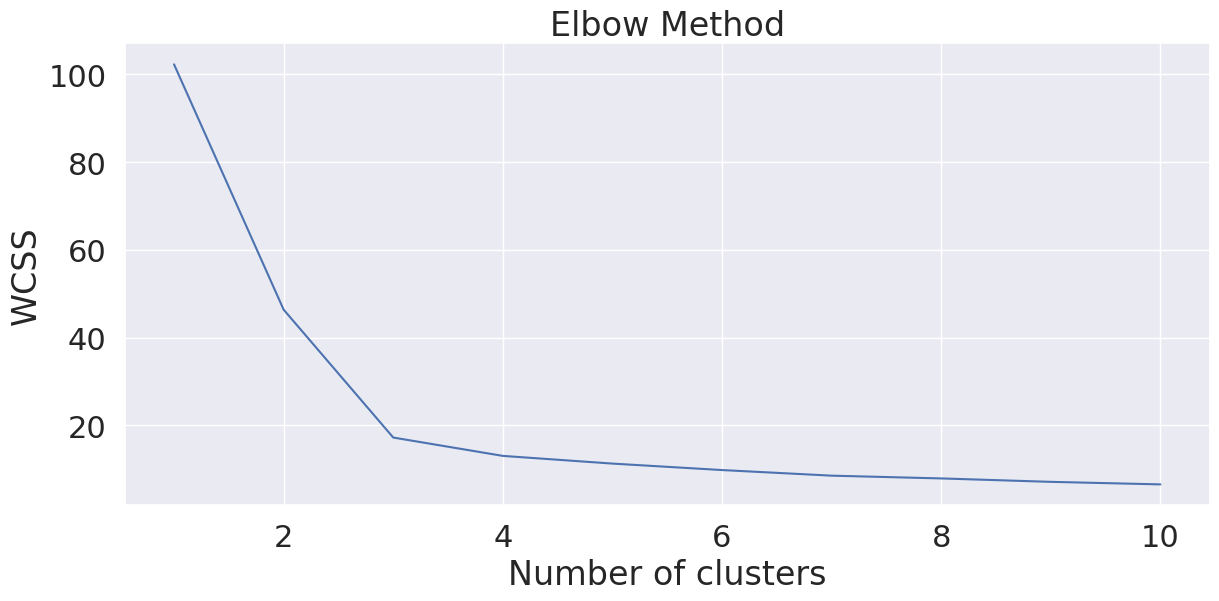

In [41]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i,random_state=0)
    kmeans.fit(pca_norm_wine)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [42]:
#Build Cluster algorithm

KM_clusters = KMeans(3, random_state=42)
KM_clusters.fit(pca_norm_wine)

KMeans(n_clusters=3, random_state=42)

In [43]:
y=pd.DataFrame(KM_clusters.fit_predict(pca_norm_wine),columns=['clusterid_Kmeans'])
y['clusterid_Kmeans'].value_counts()

0    70
2    60
1    48
Name: clusterid_Kmeans, dtype: int64

**Preparing Actual Vs. Predicted Clusering Data**

In [46]:
wine_class = wine_data['Type']
wine_class = pd.Series(wine_class)

In [51]:
clustersid_HC = H_clusters.labels_
clustersid_HC = pd.Series(clustersid_HC)

In [52]:
clusterid_Kmeans = KM_clusters.labels_
clusterid_Kmeans = pd.Series(clusterid_Kmeans)

In [53]:
pred_df = pd.concat([wine_class, clustersid_HC, clusterid_Kmeans],axis = 1)
pred_df

,Type,0,1
0,1,2,2
1,1,2,2
2,1,2,2
3,1,2,2
4,1,2,2
...,...,...,...
173,3,1,1
174,3,1,1
175,3,1,1
176,3,1,1
